interactive(children=(IntSlider(value=1000, description='SamplesNum', layout=Layout(width='800px'), max=10000,…

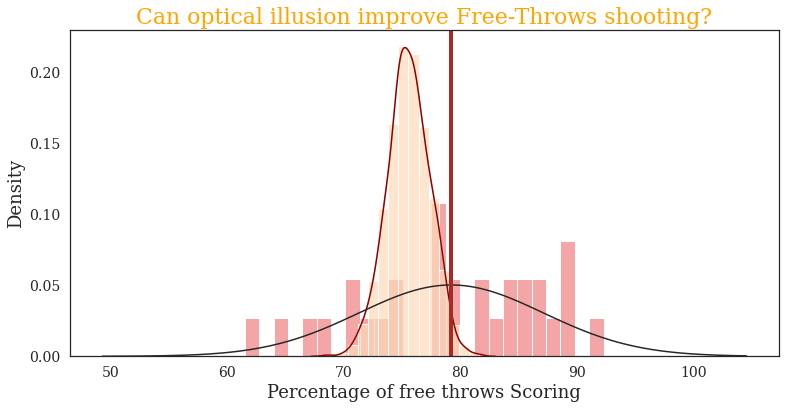

In [2]:
# nbi:hide_in 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
import random
from scipy import stats
from IPython.display import HTML
from scipy.stats import norm

data3 = pd.read_csv("data3.csv")
data4 = pd.read_csv("data4.csv")
FTN = data3['FT']
FTI = data4['FT']

sns.set(font="serif", style = "white")

def mean_boot(SamplesNum=1000, Sample_Size = 30):  
  meanFTN = np.zeros(SamplesNum)
  for i in range(SamplesNum):
      SampledFTN=random.choices(FTN, k=Sample_Size)
      meanFTN[i]=np.mean(SampledFTN)
      FTIsample = random.choices(FTI, k=Sample_Size)
      x = np.mean(FTIsample)

  plt.figure(figsize=(12.7,6))
  sns.histplot(FTIsample,bins=25,alpha=0.7, color="lightcoral", stat = "density", label = "The sample with Optical Illusion");  
  sns.histplot(meanFTN,bins=15,alpha=0.7, color="peachpuff", stat = "density", kde = True, label = "Sampling distrinution of NBA players");
  sns.kdeplot(meanFTN,color="darkred");
  sns.distplot(FTIsample,kde = False, fit = norm, hist = False, color = "plum");
  plt.title ("Can optical illusion improve Free-Throws shooting?", size = 22, color = "orange")
  plt.xlabel("Percentage of free throws Scoring", size = 18)
  plt.ylabel("Density", size =18)
  plt.yticks(size =14)
  plt.xticks(size =14)
  plt.axvline(x=np.mean(FTIsample), color='brown', linestyle='-', linewidth = 4, label = "% of Shooting with Optical Illusion is " + str(np.round(x, decimals = 2)));
  plt.axvline(x=typeI, ymin=0,ymax=100, color='black', linestyle='--', label = "Criterion alpha in percentages");
  plt.legend(fontsize = 14)

  print("Overall, " + str(stats.percentileofscore(meanFTN,(x)))+str(" % of samples are shooting worth than our sample"))
  print("Or we can say that " + str(np.round(100 - stats.percentileofscore(meanFTN,(x)), decimals = 2))+str(" % are shooting better than our sample"))  
int_widget = interactive(mean_boot,SamplesNum=(1000,10000,100), Sample_Size=(2,100,1))

int_widget.children[0].layout = Layout(width='800px')
int_widget.children[1].layout = Layout(width='500px')
display(int_widget)

display(HTML('''<style>[data-mime-type="application/vnd.jupyter.stdout"] pre { font-size:18px}</style>'''))



